# Analysis Result Visualization

Click [here](../res/result.xlsx) to open result Excel file.

In [52]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Set path to result Excel file
file_path = '..\\res\\result.xlsx'

# Load Excel file
workbook = openpyxl.load_workbook(file_path)

# Select first sheet
sheet = workbook.active

# Convert data into DataFrame
data = sheet.values
columns = next(data)  # Use first row as column names
df = pd.DataFrame(data, columns=columns)
print(df['Wafer'])

0     D07
1     D07
2     D07
3     D07
4     D07
     ... 
93    D24
94    D24
95    D24
96    D24
97    D24
Name: Wafer, Length: 98, dtype: object


In [54]:
def plot_by_wafer(wafers, data_by_wafer, /, title, ylabel):
    plt.figure(figsize=(10, 6))
    # Map categories to numbers
    category_mapping = {category: index for index, category in enumerate(wafers)}
    for category, values in data_by_wafer.items():
        x = [category_mapping[category]] * len(values)  # Set all values to the index of their category
        plt.scatter(x, values, label=category)

    # Set horizontal axis to category name
    plt.xticks(ticks=range(len(wafers)), labels=wafers)
    
    plt.title(title)
    plt.xlabel('Wafer')
    plt.ylabel(ylabel)
    plt.legend(title='Wafer')
    plt.grid(True)
    plt.show()

In [55]:
wafers = sorted(set(df['Wafer']))


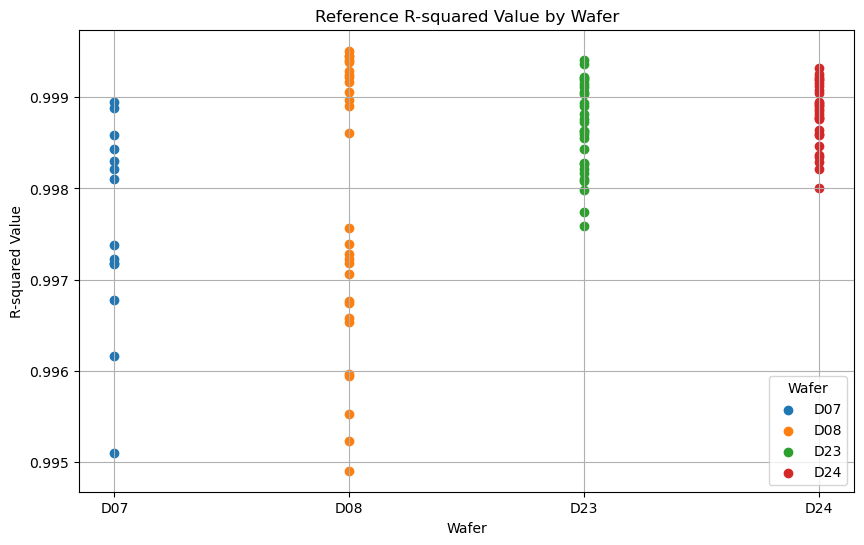

In [56]:
ref_rsquared = {wafer: list(df.loc[df['Wafer'] == wafer, 'Rsq of Ref. spectrum (6th)']) for wafer in wafers}
plot_by_wafer(wafers, ref_rsquared, title='Reference R-squared Value by Wafer', ylabel='R-squared Value')

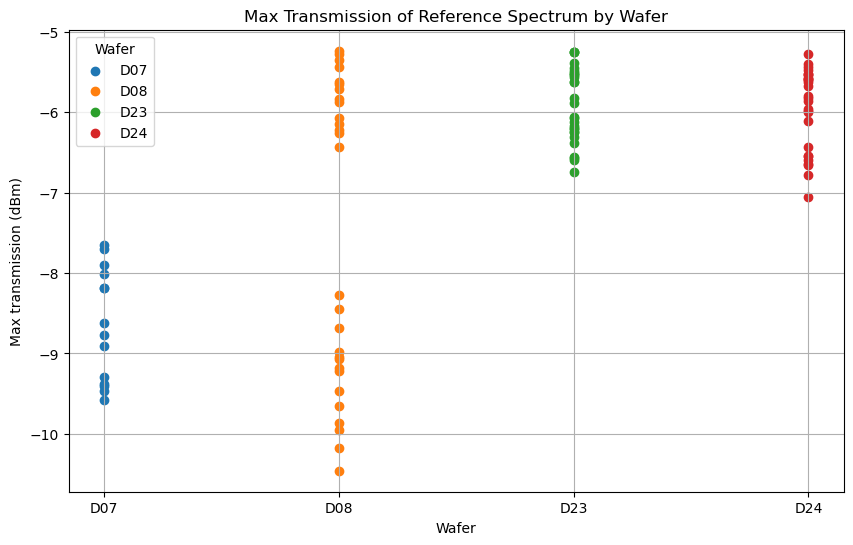

In [57]:
ref_max_transmission = {wafer: list(df.loc[df['Wafer'] == wafer, 'Max transmission of Ref. spectrum (dBm)']) for wafer in wafers}
plot_by_wafer(wafers, ref_max_transmission, title='Max Transmission of Reference Spectrum by Wafer', ylabel='Max transmission (dBm)')